In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Bank Customer Churn Prediction.csv')
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df['country'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [4]:
df['gender'].replace({'Female': 1, 'Male': 0},inplace=True)
df['country'].replace({'France': 0, 'Spain': 1, 'Germany': 2},inplace=True)

In [5]:
df['country'].unique()

array([0, 1, 2], dtype=int64)

In [6]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.drop('customer_id',axis='columns',inplace=True)

In [8]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,2,0,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.dtypes

credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [10]:
df.shape

(10000, 11)

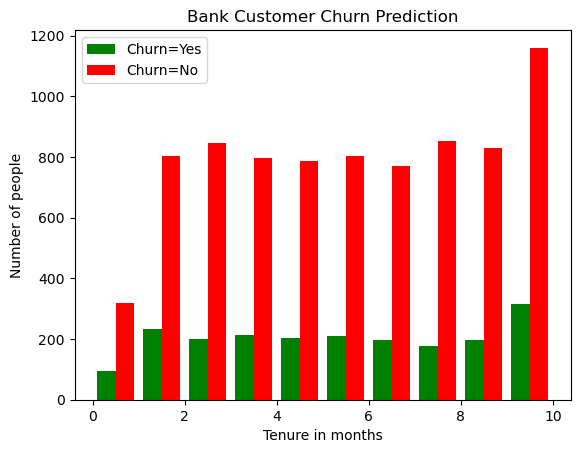

In [11]:
tenure_churn_no=df[df.churn==0].tenure
tenure_churn_yes=df[df.churn==1].tenure

plt.title('Bank Customer Churn Prediction')
plt.xlabel('Tenure in months')
plt.ylabel('Number of people')
plt.hist([tenure_churn_yes, tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [12]:
cols_to_scale=['tenure','balance','estimated_salary','credit_score']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [13]:
X=df.drop('churn',axis='columns')
y=df['churn']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [15]:
X_train.shape

(8000, 10)

In [16]:
X_test.shape

(2000, 10)

In [17]:
len(X_train.columns)

10

In [18]:
df

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0.538,0,1,42,0.2,0.000000,1,1,1,0.506735,1
1,0.516,1,1,41,0.1,0.334031,1,0,1,0.562709,0
2,0.304,0,1,42,0.8,0.636357,3,1,0,0.569654,1
3,0.698,0,1,39,0.1,0.000000,2,0,0,0.469120,0
4,1.000,1,1,43,0.2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0,39,0.5,0.000000,2,1,0,0.481341,0
9996,0.332,0,0,35,1.0,0.228657,1,1,1,0.508490,0
9997,0.718,0,1,36,0.7,0.000000,1,0,1,0.210390,1
9998,0.844,2,0,42,0.3,0.299226,2,1,0,0.464429,1


In [39]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(10,),activation='relu'),
    keras.layers.Dense(5,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100,batch_size=8)

Epoch 1/100


C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7927 - loss: 0.6930
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7907 - loss: 0.5431
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8003 - loss: 0.5032
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7948 - loss: 0.4836
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7948 - loss: 0.4641
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7928 - loss: 0.4535
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7956 - loss: 0.4499
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8062 - loss: 0.4406
Epoch 9/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8124 - loss: 0.4471
Epoch 10/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8121 - loss: 0.4423
Epoch 11/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8070 - loss: 0.4536
Epoch 12/100
1000/1000 ━━━━━━━━

In [40]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7951 - loss: 0.4274


[0.43052998185157776, 0.7979999780654907]

In [41]:
yp=model.predict(X_test)
yp[:10]

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[0.09480345],
       [0.06975506],
       [0.06927267],
       [0.05632904],
       [0.09932683],
       [0.3029042 ],
       [0.04740927],
       [0.14412215],
       [0.06001947],
       [0.18243992]], dtype=float32)

In [42]:
y_pred=[]
for element in yp:
    if element>0.2:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [43]:
y_pred[:15]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [44]:
y_test[:15]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
8594    0
1805    0
3631    0
837     0
9322    0
Name: churn, dtype: int64

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1595
           1       0.41      0.60      0.49       405

    accuracy                           0.75      2000
   macro avg       0.65      0.69      0.66      2000
weighted avg       0.79      0.75      0.76      2000



Text(95.72222222222221, 0.5, 'Truth')

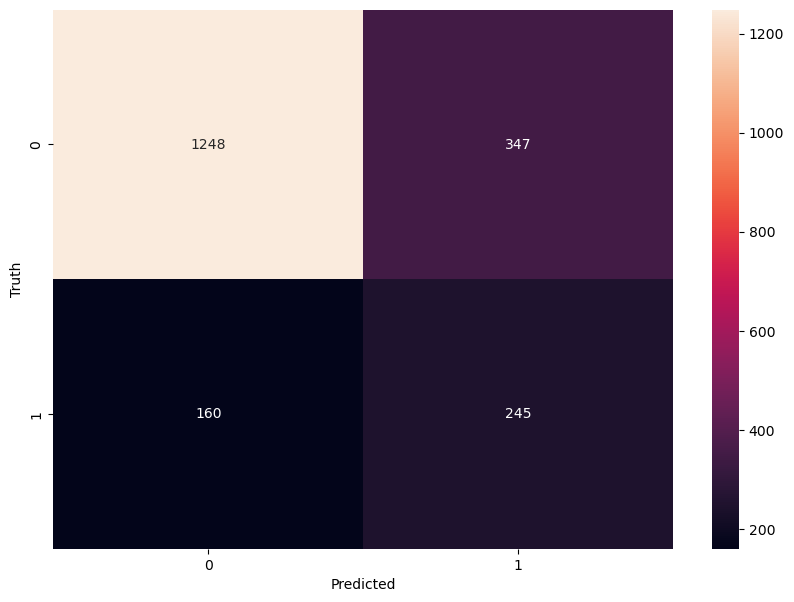

In [46]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')